In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

from tqdm import tqdm

In [2]:
def f(x):
    return (x-1)**2

In [3]:
def Df(x,f,h=0.001):
    
    d = (f(x+h) - f(x-h))/(2*h)
    
    return d

In [4]:
x = np.linspace(-1,4,20)
y = f(x)
dy = Df(x,f)

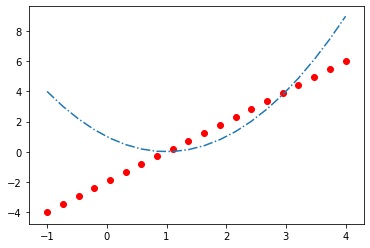

In [6]:
plt.plot(x,y,'-.')
plt.scatter(x,dy,color='r')